<a href="https://colab.research.google.com/github/R3gm/Riffusion_audio_to_audio_style_transfer/blob/main/Riffusion_Gradio_AI_Generated_Music_Video_audio_to_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Riffusion

|   |  |
| ----------- | ---- |
| Repository | [![GitHub Repository](https://img.shields.io/badge/GitHub-Repository-black?style=flat-square&logo=github)](https://github.com/R3gm/Riffusion_audio_to_audio_style_transfer/) |

| Code credits | Link |
| ----------- | ---- |
| 🎉 Repository | [![GitHub Repository](https://img.shields.io/github/stars/riffusion/riffusion?style=social)](https://github.com/riffusion/riffusion) |
| Original Colab | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1FhH3HlN8Ps_Pr9OR6Qcfbfz7utDvICl0?usp=sharing) |
|  Notebook by amrrs | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/amrrs/ai-music-video) |
| 🚀 Online inference | [![Hugging Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/fffiloni/spectrogram-to-music) |
| 🔥 Discover More Colab Notebooks | [![GitHub Repository](https://img.shields.io/badge/GitHub-Repository-black?style=flat-square&logo=github)](https://github.com/R3gm/Colab-resources/) |



In [ ]:
#@title Clone the inference repo
!git clone https://github.com/riffusion/riffusion
%cd riffusion

fatal: destination path 'riffusion' already exists and is not an empty directory.
/content/riffusion


In [ ]:
#@title Install requirements (you may need to restart the kernel after this)
!pip install -q -r requirements.txt
!pip install -q gradio
!pip install -q --upgrade pillow
# fix xformers
!pip uninstall -q -y torch xformers triton torchtext
!pip install -q torch==1.13.1+cu117 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117
!pip install -q xformers==0.0.16

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 111.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.1/87.1 kB 13.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.8/418.8 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

# Import all required Libraries 

In [ ]:
### RESTART RUNTIME before run this cell ###
%cd riffusion
from diffusers import DiffusionPipeline
from riffusion.spectrogram_image_converter import SpectrogramImageConverter
from riffusion.spectrogram_params import SpectrogramParams
from io import BytesIO
from IPython.display import Audio
import gradio as gr
import torch
from PIL import Image
from diffusers import StableDiffusionPipeline
import random
from pydub import AudioSegment
from google.colab import files

/content/riffusion


Error caught was: No module named 'triton'


# First part
## Credit to riffusion team for the helper script to convert spectogram to audio

## Load the model from Hugging Face Model Hub

In [ ]:
model_id = "riffusion/riffusion-model-v1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.enable_xformers_memory_efficient_attention()

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:165: FutureWarning: The configuration file of the unet has set the default `sample_size` to smaller than 64 which seems highly unlikely. If your checkpoint is a fine-tuned version of any of the following: 
- CompVis/stable-diffusion-v1-4 
- CompVis/stable-diffusion-v1-3 
- CompVis/stable-diffusion-v1-2 
- CompVis/stable-diffusion-v1-1 
- runwayml/stable-diffusion-v1-5 
- runwayml/stable-diffusion-inpainting 
 you should change 'sample_size' to 64 in the configuration file. Please make sure to update the config accordingly as leaving `sample_size=32` in the config might lead to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull request for the `unet/

In [ ]:
#@title Define a `predict` function

params = SpectrogramParams()
converter = SpectrogramImageConverter(params)

def predict(prompt, negative_prompt):
    spec = pipe(
        prompt,
        negative_prompt=negative_prompt,
        width=768,
        num_inference_steps=50,
    ).images[0]
    
    wav = converter.audio_from_spectrogram_image(image=spec)
    wav.export('output.wav', format='wav')
    return 'output.wav', spec

  0%|          | 0/50 [00:00<?, ?it/s]

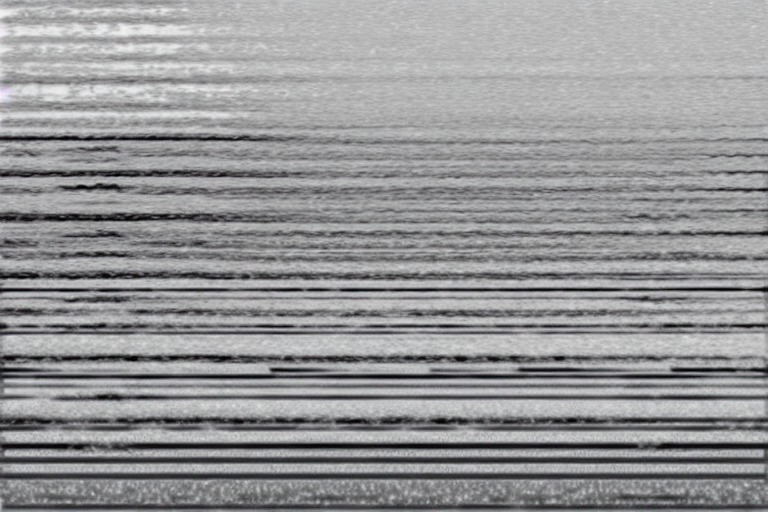

In [ ]:
#@title Run with Colab interface
prompt = "epic orchestra symphony "#@param {type:"string"}
negative_prompt = "drums, pop"#@param {type:"string"}

path, spec = predict(prompt, negative_prompt)

display(spec)
Audio('output.wav')

## Create the core Audio Function

In [ ]:
img_model_id = "runwayml/stable-diffusion-v1-5"
img_pipe = StableDiffusionPipeline.from_pretrained(img_model_id, torch_dtype=torch.float16, revision="fp16")
img_pipe = img_pipe.to("cuda")
img_pipe.enable_xformers_memory_efficient_attention()

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

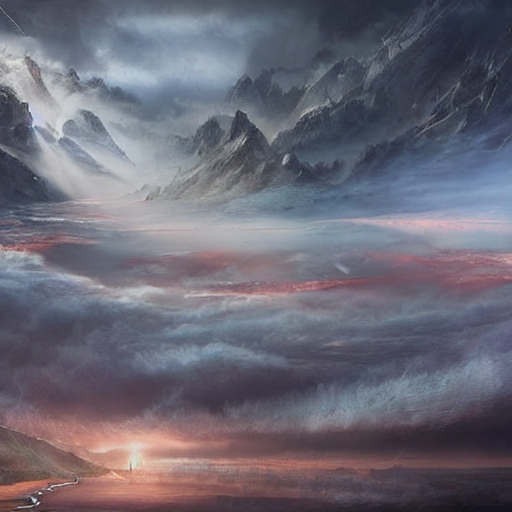

In [ ]:
image = img_pipe(prompt + ", artstation hall of fame gallery, editors choice, #1 digital painting of all time, most beautiful image ever created, emotionally evocative, greatest art ever made, lifetime achievement magnum opus masterpiece, the most amazing breathtaking image with the deepest message ever painted, a thing of beauty beyond imagination or words").images[0]
image.save("img.png")
image

In [ ]:
COLORS = [
    ["#ff0000", "#00ff00"],
    ["#00ff00", "#0000ff"],
    ["#0000ff", "#ff0000"],
]

# merge audio and image
video_path = gr.make_waveform('output.wav', bg_image='img.png', bars_color=random.choice(COLORS))

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:2229: RuntimeWarning: overflow encountered in short_scalars
  dx = [convert(x0 + ddx) - x for ddx in dx]
/usr/local/lib/python3.10/dist-packages/matplotlib/patches.py:739: RuntimeWarning: overflow encountered in short_scalars
  y1 = self.convert_yunits(self._y0 + self._height)


In [ ]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(video_path)

In [ ]:
def audio_gen(prompt, negative_prompt):

  path, spectogram = predict(prompt, negative_prompt)
  print("audio saved")

  print("img started")
  txt_prompt = prompt + ", artstation hall of fame gallery, editors choice, #1 digital painting of all time, most beautiful image ever created, emotionally evocative, greatest art ever made, lifetime achievement magnum opus masterpiece, the most amazing breathtaking image with the deepest message ever painted, a thing of beauty beyond imagination or words"
  image = img_pipe(txt_prompt).images[0] 
  image.save("img.png") 
  print("img saved")

  video = gr.make_waveform('output.wav', bg_image='img.png', bars_color=random.choice(COLORS))
  print("video done!")
  
  return ('output.wav',video)

In [ ]:
# test function
audio_gen(prompt="lazy nights", negative_prompt='drums')

  0%|          | 0/50 [00:00<?, ?it/s]

audio saved
img started


  0%|          | 0/50 [00:00<?, ?it/s]

img saved
video done!


('output.wav', '/tmp/tmp1w32jpph.mp4')

In [ ]:
gr.Interface(
    audio_gen,
    inputs=[gr.Textbox(label="prompt"),gr.Textbox(label="negative_prompt")],
    outputs=[
        gr.Audio(type='filepath'),
        gr.Video(type='filepath')
    ],
    title = 'Riffusion + Stable Diffusion - AI generated Music Video'
).launch(debug = True)

In [ ]:
# fix error colab utf8
#import locale
#locale.getpreferredencoding = lambda: "UTF-8"

# Second part

#### NOTE: Colab doesn't have enough memory to simultaneously load both the base riffusion pipeline and the audio2audio pipeline. You'll need to re-run the first 'imports' cell if you want to run regular riffusion after instantiating the audio2audio pipeline in in this cell

#### you can run the audio2audio inference cell (below) as many times as you like, though

In [ ]:
#@title Upload your own files for style transfer

uploaded = files.upload()
audio_raw = next(iter(uploaded))                                                                      

# convert wav      
audio_wav = "test.wav"                                                    
sound = AudioSegment.from_mp3(audio_raw)
sound.export(audio_wav, format="wav")

Saving test.mp3 to test.mp3


<_io.BufferedRandom name='test.wav'>

## Convert audio to image

In [ ]:
from riffusion.cli import audio_to_image

audio_spetrogram = 'image.jpg'

#@argh.arg("--step-size-ms", help="Duration of one pixel in the X axis of the spectrogram image")
#@argh.arg("--num-frequencies", help="Number of Y axes in the spectrogram image")
audio_to_image(
    
    audio= audio_wav,
    image= audio_spetrogram,
    step_size_ms = 10,
    num_frequencies = 512,
    min_frequency= 0,
    max_frequency= 10000,
    window_duration_ms = 100,
    padded_duration_ms = 400,
    power_for_image = 0.25,
    stereo = False,
    device = "cuda",
)


Wrote image.jpg


In [ ]:
spectrogram_image = Image.open(audio_spetrogram)
display(spectrogram_image)

In [ ]:
#@title Audio-to-audio based on the previous generated sound: define new pipeline
import torch
from diffusers import StableDiffusionImg2ImgPipeline

# load the pipeline
device = "cuda"
MODEL_ID = "riffusion/riffusion-model-v1"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16)
pipe = pipe.to(device)
pipe.enable_xformers_memory_efficient_attention()

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_img2img.py:204: FutureWarning: The configuration file of the unet has set the default `sample_size` to smaller than 64 which seems highly unlikely. If your checkpoint is a fine-tuned version of any of the following: 
- CompVis/stable-diffusion-v1-4 
- CompVis/stable-diffusion-v1-3 
- CompVis/stable-diffusion-v1-2 
- CompVis/stable-diffusion-v1-1 
- runwayml/stable-diffusion-v1-5 
- runwayml/stable-diffusion-inpainting 
 you should change 'sample_size' to 64 in the configuration file. Please make sure to update the config accordingly as leaving `sample_size=32` in the config might lead to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull request for th

In [ ]:
#@title Audio-to-audio: run inference
prompt = "solo piano piece, classical" #@param {type:"string"}
STRENGTH = 0.6 #@param {type:"number"}
GUIDANDE_SCALE = 7 #@param {type:"integer"}

image_paint = Image.open(audio_spetrogram)

new_audio = pipe(
    prompt=prompt,
    image=image_paint,
    strength=STRENGTH,
    guidance_scale=GUIDANDE_SCALE
).images

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
# Display the new spectrogram
display(new_audio[0])

## Results

In [ ]:
# Audio of the new spectrogram
audio_result = 'audio_result.wav'

params = SpectrogramParams()
converter = SpectrogramImageConverter(params)

wav = converter.audio_from_spectrogram_image(new_audio[0])
wav.export(audio_result, format='wav')

Audio(audio_result)

In [ ]:
# Original Audio, CC licence https://freemusicarchive.org/music/Andrew_Codeman/Fall_Trajectory/Andrew_Codeman_Fall_Trajectory_01_Tired_traveler_on_the_way_to_home/
Audio(audio_wav)